### Fashion-MNIST data set

Fashion-MNIST is a dataset of Zalando's article images. This data set has 60,000 examples of training set and 10,000 examples of test set. 
Each example is a 28x28 grayscale image of the fashion products which come from different gender groups.
Each image has a label from 10 different classes as follows:

* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

You can find the original data set from here:
https://github.com/zalandoresearch/fashion-mnist

### Objectives *

In this notebook, I have tried to do an expolatory data analysis of Fashion-MNIST data set in order to have a better understanding of the data. After that, I have applied some of the supervised classification algorithm with different hyperparameteres to get benchmark results for accuracy and f-beta score on this data set.
For the next step, I have applied Random Forest classifier along with Principal component analysis (PCA) to apply the dimentionaly reduction technique along with supervised learning. 


### Table of contents *

* Adding import statements
* Reading the data
* Total number of records in train and test data set
* Combining train and test data set as X, y
* Statistics summary of the data set
* Output labels for training & test data set
* Plotting the output labels 
* Image visualization 
* Applying classification algorithms on the Data
* Random Forest classifier 
* Logistic Regression classifier
* Support Vector classifier
* K Nearest Neighbors classifier
* Gradient Boosting classifier
* PCA
* Applying Random Forest Classifier with PCA 
* Result Comparision for a Rabge of 100 components
* Interpret PCA Results

### Adding import statements

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Reading the data

In [2]:
train_data_raw = pd.read_csv('data/fashion-mnist_train.csv')
test_data_raw = pd.read_csv('data/fashion-mnist_test.csv')

In [3]:
train_data_raw.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data_raw.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Total number of records in train and test data set

In [5]:
print("Number of rows in train data is {}\nNumber of columns in train data is {}".format(
    train_data_raw.shape[0], train_data_raw.shape[1]))

Number of rows in train data is 60000
Number of columns in train data is 785


In [6]:
print("Number of rows in test data is {}\nNumber of columns in test data is {}".format(
    test_data_raw.shape[0], test_data_raw.shape[1]))

Number of rows in test data is 10000
Number of columns in test data is 785


In [7]:
y_train = train_data_raw['label']
y_test = test_data_raw['label']

In [8]:
print("Number of labels in train data is {}\nNumber of labels in test data is {}".format(
    y_train.shape[0], y_test.shape[0]))

Number of labels in train data is 60000
Number of labels in test data is 10000


### Combining train and test data set as X, y

In [9]:
# Combing train and test set and drop the label column from X
X = pd.concat([train_data_raw, test_data_raw]).drop('label', axis=1)
y = pd.concat([y_train, y_test])

In [10]:
print("Number of rows in the data set is {}\nNumber of columns is {}".format(
    X.shape[0], X.shape[1]))

Number of rows in the data set is 70000
Number of columns is 784


In [11]:
print("Number of labels in the data set is {}".format(
    y.shape[0]))


Number of labels in the data set is 70000


### Statistics summary of the data set

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 9999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 419.2 MB


In [13]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.000829,0.006743,0.037729,0.098371,0.242343,0.402571,0.808757,2.215843,5.649971,14.470871,...,34.581886,23.268000,16.565943,17.86960,22.821271,17.894157,8.496757,2.723057,0.823229,0.069586
std,0.088152,0.319931,1.472886,2.419523,4.360495,5.811048,8.269954,14.231137,23.754212,38.274184,...,57.594114,48.882093,42.005114,43.99069,51.812432,45.146046,29.494913,17.261065,9.110774,2.099525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,45.000000,226.000000,185.000000,227.000000,230.000000,247.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


### Output labels for training & test data set

In order to have a better understaniding of the data set, I will do some exploratory data analysis and data visualization on Fashion-MNIST data. First I'll put label's names instead of label's class number to be more human readable. 

In [14]:
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
train_data_raw['label'] = train_data_raw.label.map(labels)
test_data_raw['label'] = test_data_raw.label.map(labels)

In [15]:
train_data_raw.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_data_raw.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,Pullover,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,Pullover,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
label_counts_train = train_data_raw['label'].value_counts()
label_counts_train

Sandal         6000
Shirt          6000
Sneaker        6000
Trouser        6000
Ankle boot     6000
T-shirt/top    6000
Bag            6000
Pullover       6000
Coat           6000
Dress          6000
Name: label, dtype: int64

In [18]:
label_counts_test = test_data_raw['label'].value_counts()
label_counts_test

Dress          1000
Sandal         1000
Sneaker        1000
Bag            1000
Shirt          1000
Trouser        1000
Ankle boot     1000
T-shirt/top    1000
Coat           1000
Pullover       1000
Name: label, dtype: int64

### Plotting the output labels 

[Text(0,0,'Sandal'),
 Text(0,0,'Shirt'),
 Text(0,0,'Sneaker'),
 Text(0,0,'Trouser'),
 Text(0,0,'Ankle boot'),
 Text(0,0,'T-shirt/top'),
 Text(0,0,'Bag'),
 Text(0,0,'Pullover'),
 Text(0,0,'Coat'),
 Text(0,0,'Dress')]

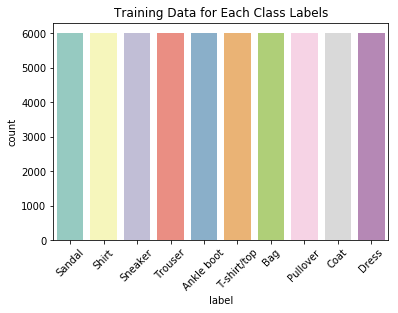

In [19]:
ax1 = sns.countplot(train_data_raw.label, order = label_counts_train.index, palette='Set3')
ax1.set_title('Training Data for Each Class Labels')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

[Text(0,0,'Dress'),
 Text(0,0,'Sandal'),
 Text(0,0,'Sneaker'),
 Text(0,0,'Bag'),
 Text(0,0,'Shirt'),
 Text(0,0,'Trouser'),
 Text(0,0,'Ankle boot'),
 Text(0,0,'T-shirt/top'),
 Text(0,0,'Coat'),
 Text(0,0,'Pullover')]

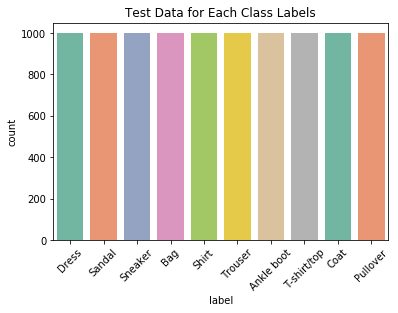

In [20]:
ax2 = sns.countplot(test_data_raw.label, order = label_counts_test.index, palette='Set2')
ax2.set_title('Test Data for Each Class Labels')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

### Image visualization *

In [21]:
def show_images(num_images):
    '''
    INPUT: num_images - int - The number of images you would like to view.
           Mod 10 of num_images should be 0 and it should be fewer than 101 images.
    OUTPUT: A figure with the images shown for the training data.
    '''
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X.iloc[digit_num].as_matrix().reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
    else:
        print('That is not the right input, please read the docstring before continuing.')

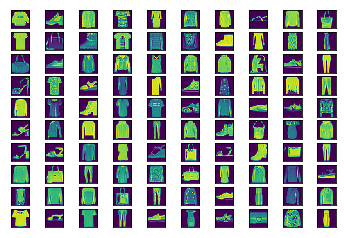

In [22]:
show_images(100)

In [23]:
image= np.asarray(test_data_raw.iloc[8].values[1:].reshape(28,28)).astype(int)

In [24]:
image.dtype

dtype('int64')

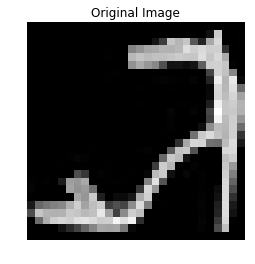

In [25]:
%matplotlib inline
#plt.subplot(2,1,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

In [26]:
# Flatten the image into 1 dimension pixels
pixels = image.flatten()

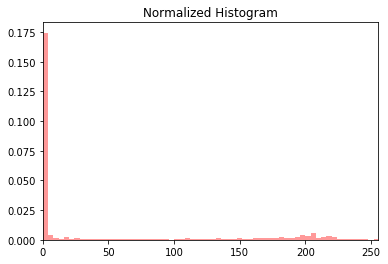

In [27]:
# Display a histogram of the pixels of original image
#plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized Histogram')
plt.hist(pixels, bins=64, color='red', alpha=0.4, range=(0,256), normed=True)
# Display the plot
plt.show()

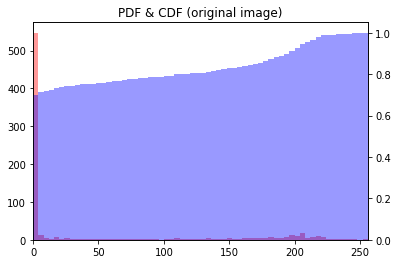

In [28]:
# Display a histogram of the pixels of original image
#plt.subplot(2,1,2)
# Probability density function
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False, color='red', alpha=0.4)
plt.grid('off')
# Use plt.twinx() to overlay the CDF 
plt.twinx()

# Display a cumulative histogram of the pixels
# Cumulative distribution function
cdf = plt.hist(pixels, bins=64, range=(0,256), normed=True, cumulative=True, color='blue', alpha=0.4)

# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()


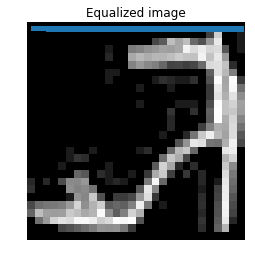

In [29]:
# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
#plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')
plt.show()


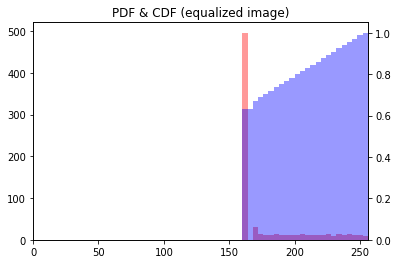

In [30]:
# Generate a histogram of the new pixels
#plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False, color='red', alpha=0.4) # working with bins (bin size)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256), cumulative=True, normed=True, color='blue', alpha=0.4)
plt.show()


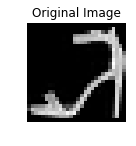

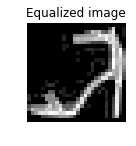

In [31]:
plt.subplot(2,1,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()
plt.subplot(2,1,2)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')
plt.show()

### Applying classification algorithms on the data

In this section, I've applied classification algorithm on Fashion-MNIST data set to obtain the accuracy and F-Beta score. For each algorithm, I have tried multiple set of hyperparametes to see which set give higher accuracy and F-Beta score. These algorithms include: Random Forest, Logistic Regression, Support Vector Classifier and K Nearest Neighbors classifier.

### Random Forest classifier 

#### First classifier

In [32]:
#Creating training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
#Instantiate the calssifier 
clf_randomForest = RandomForestClassifier()

#Fit the classifier
clf_randomForest.fit(X_train, y_train)

#Predict the labels
y_preds = clf_randomForest.predict(X_test)

In [98]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Random Forest clissifier is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Random Forest clissifier is: ', fscore)

Accuracy score for Random Forest clissifier is:  0.8574025974025974
F-Score for Random Forest clissifier is:  0.8559789734192698


In [35]:
clf_randomForest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Second classifier

In [36]:
#Instantiate the calssifier 
clf_randomForest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=100)

#Fit the classifier
clf_randomForest.fit(X_train, y_train)

#Predict the labels
y_preds = clf_randomForest.predict(X_test)

In [37]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Random Forest clissifier is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Random Forest clissifier is: ', fscore)

Accuracy score for Random Forest clissifier is:  0.8795670995670996
F-Score for Random Forest clissifier is:  0.878522733187552


In [38]:
#Confusion Matrix
confMat = confusion_matrix(y_test, y_preds)
print(confMat)

[[1990    1   41   75   10    1  168    0   25    0]
 [   6 2182    9   45    2    0    7    0    0    0]
 [  16    1 1904   32  245    0   95    0   15    0]
 [  47    3   12 2162   77    0   54    0    7    0]
 [   5    2  180  102 1993    0  108    0    7    0]
 [   0    0    0    0    0 2115    1   66    6   29]
 [ 386    7  287   60  200    2 1335    0   37    0]
 [   0    0    0    0    0   36    0 2186    3   99]
 [   4    0    9    6    6    4   15    2 2273    1]
 [   0    0    0    0    0   26    0   87    5 2178]]


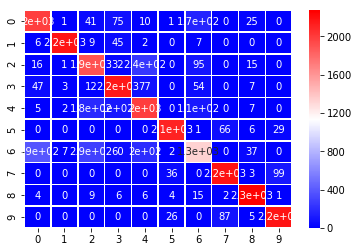

In [39]:
sns.heatmap(confMat, annot=True, cmap='bwr', linewidths=.5)

#### Third classifier

In [40]:
#Instantiate the calssifier 
clf_randomForest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=100)

#Fit the classifier
clf_randomForest.fit(X_train, y_train)

#Predict the labels
y_preds = clf_randomForest.predict(X_test)

In [41]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Random Forest clissifier is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Random Forest clissifier is: ', fscore)

Accuracy score for Random Forest clissifier is:  0.8790476190476191
F-Score for Random Forest clissifier is:  0.8779689792501604


#### Forth classifier

In [42]:
#Instantiate the calssifier 
clf_randomForest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=50)

#Fit the classifier
clf_randomForest.fit(X_train, y_train)

#Predict the labels
y_preds = clf_randomForest.predict(X_test)

In [43]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Random Forest clissifier is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Random Forest clissifier is: ', fscore)

Accuracy score for Random Forest clissifier is:  0.8804761904761905
F-Score for Random Forest clissifier is:  0.8792845553250274


#### Fifth classifier

In [44]:
#Instantiate the calssifier 
clf_randomForest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=50)

#Fit the classifier
clf_randomForest.fit(X_train, y_train)

#Predict the labels
y_preds = clf_randomForest.predict(X_test)

In [45]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Random Forest clissifier is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Random Forest clissifier is: ', fscore)

Accuracy score for Random Forest clissifier is:  0.8794372294372295
F-Score for Random Forest clissifier is:  0.8782604413998296


#### Sixth classifer

In [46]:
#Instantiate the calssifier 
clf_randomForest = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=50)

#Fit the classifier
clf_randomForest.fit(X_train, y_train)

#Predict the labels
y_preds = clf_randomForest.predict(X_test)

In [47]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Random Forest clissifier is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Random Forest clissifier is: ', fscore)

Accuracy score for Random Forest clissifier is:  0.8597835497835498
F-Score for Random Forest clissifier is:  0.8585678569533342


#### Results 

| Classifier | Parameters | Accuracy Score | F-Beta Score |
| --- | --- | --- |
| Random Forest Classifier | Default Parameters | 0.85602 | 0.85448 |
| Random Forest Classifier | n_estimators=100, criterion='entropy', max_depth=100 | 0.87957 | 0.87852 |
| Random Forest Classifier | n_estimators=100, criterion='gini', max_depth=100 | 0.87905 | 0.87797 |
| Random Forest Classifier | n_estimators=100, criterion='gini', max_depth=50 | 0.88048 | 0.87928 |
| Random Forest Classifier | n_estimators=100, criterion='entropy', max_depth=50 | 0.87944 | 0.87826 |
| Random Forest Classifier | n_estimators=10, criterion='entropy', max_depth=50 | 0.85978 | 0.85857 |

### Logistic Regression classifier

#### First classifier

In [48]:
#Instantiate the calssifier 
clf_logisticRegression = LogisticRegression(C=1, multi_class='ovr', penalty='l1')

#Fit the classifier
clf_logisticRegression.fit(X_train, y_train)

#Predict the labels
y_preds = clf_logisticRegression.predict(X_test)

In [49]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Logistic Regression is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Logistic Regression is: ', fscore)

Accuracy score for Logistic Regression is:  0.8438528138528139
F-Score for Logistic Regression is:  0.8424166685898824


#### Second classifier

In [50]:
#Instantiate the calssifier 
clf_logisticRegression = LogisticRegression(C=10, multi_class='ovr', penalty='l1')

#Fit the classifier
clf_logisticRegression.fit(X_train, y_train)

#Predict the labels
y_preds = clf_logisticRegression.predict(X_test)

In [51]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Logistic Regression is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Logistic Regression is: ', fscore)

Accuracy score for Logistic Regression is:  0.843030303030303
F-Score for Logistic Regression is:  0.8415242740685296


#### Third classifier

In [99]:
#Instantiate the calssifier 
clf_logisticRegression = LogisticRegression(C=10, multi_class='ovr', penalty='l2')

#Fit the classifier
clf_logisticRegression.fit(X_train, y_train)

#Predict the labels
y_preds = clf_logisticRegression.predict(X_test)

In [100]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Logistic Regression is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Logistic Regression is: ', fscore)

Accuracy score for Logistic Regression is:  0.8427272727272728
F-Score for Logistic Regression is:  0.8409952170969632


#### Fourth classifier

In [101]:
#Instantiate the calssifier 
clf_logisticRegression = LogisticRegression(C=1, multi_class='ovr', penalty='l2')

#Fit the classifier
clf_logisticRegression.fit(X_train, y_train)

#Predict the labels
y_preds = clf_logisticRegression.predict(X_test)

In [102]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for Logistic Regression is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for Logistic Regression is: ', fscore)

Accuracy score for Logistic Regression is:  0.8426839826839827
F-Score for Logistic Regression is:  0.8407907107792439


#### Results

| Classifier | Parameters | Accuracy Score | F-Beta Score |
| --- | --- | --- |
| Logistic Regression Classifier | C=1, multi_class='ovr', penalty='l1' | 0.84385 | 0.84242 |
| Logistic Regression Classifier | C=10, multi_class='ovr', penalty='l1' | 0.84303 | 0.84152 |


### Support Vector classifier 

#### First classifier

In [52]:
#Instantiate the calssifier
clf_SVC = SVC(kernel='poly', C=1)

#Fit the classifier
clf_SVC.fit(X_train, y_train)

#Predict the labels
y_preds = clf_SVC.predict(X_test)

In [53]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for SVC is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for SVC is: ', fscore)

Accuracy score for SVC is:  0.873030303030303
F-Score for SVC is:  0.8732212821960952


#### Second classifier

In [54]:
#Instantiate the calssifier
clf_SVC = SVC(kernel='poly', C=10)

#Fit the classifier
clf_SVC.fit(X_train, y_train)

#Predict the labels
y_preds = clf_SVC.predict(X_test)

In [55]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for SVC is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for SVC is: ', fscore)

Accuracy score for SVC is:  0.873030303030303
F-Score for SVC is:  0.8732212821960952


#### Third classifier

In [93]:
#Instantiate the calssifier
clf_SVC = SVC(kernel='sigmoid', C=1) 

#Fit the classifier
clf_SVC.fit(X_train, y_train)

#Predict the labels
y_preds = clf_SVC.predict(X_test)

In [94]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for SVC is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for SVC is: ', fscore)

Accuracy score for SVC is:  0.09597402597402598
F-Score for SVC is:  0.01171565363518184


/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Fourth classifier

In [95]:
#Instantiate the calssifier
clf_SVC = SVC(kernel='rbf', C=10)

#Fit the classifier
clf_SVC.fit(X_train, y_train)

#Predict the labels
y_preds = clf_SVC.predict(X_test)

In [96]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for SVC is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for SVC is: ', fscore)

Accuracy score for SVC is:  0.09735930735930735
F-Score for SVC is:  0.018575234051404328


/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Results

| Classifier | Parameters | Accuracy Score | F-Beta Score |
| --- | --- | --- |
| Support Vector Classifier | kernel='poly', C=1 | 0.87303 | 0.87322 |
| Support Vector Classifier | kernel='poly', C=10 | 0.87303 | 0.87322 |


### K Nearest Neighbors classifier

#### First classifier

In [56]:
#Instantiate the calssifier
clf_KNN = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)

#Fit the classifier
clf_KNN.fit(X_train, y_train)

#Predict the labels
y_preds = clf_KNN.predict(X_test)

In [57]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for KNN is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for KNN is: ', fscore)

Accuracy score for KNN is:  0.8550649350649351
F-Score for KNN is:  0.8568692939936626


#### Second classifier

In [60]:
#Instantiate the calssifier
clf_KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

#Fit the classifier
clf_KNN.fit(X_train, y_train)

#Predict the labels
y_preds = clf_KNN.predict(X_test)

In [61]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for KNN is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for KNN is: ', fscore)

Accuracy score for KNN is:  0.8545454545454545
F-Score for KNN is:  0.8559692310890152


#### Third classifier

In [62]:
#Instantiate the calssifier
clf_KNN = KNeighborsClassifier(n_neighbors=9, weights='distance', p=2)

#Fit the classifier
clf_KNN.fit(X_train, y_train)

#Predict the labels
y_preds = clf_KNN.predict(X_test)

In [63]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for KNN is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for KNN is: ', fscore)

Accuracy score for KNN is:  0.8516017316017316
F-Score for KNN is:  0.8534479352015198


#### Forth classifier

In [64]:
#Instantiate the calssifier
clf_KNN = KNeighborsClassifier(n_neighbors=9, weights='uniform', p=2)

#Fit the classifier
clf_KNN.fit(X_train, y_train)

#Predict the labels
y_preds = clf_KNN.predict(X_test)

In [65]:
#Accuracy Score and F-beta
acc = accuracy_score(y_test, y_preds)
print('Accuracy score for KNN is: ', acc)
fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
print('F-Score for KNN is: ', fscore)

Accuracy score for KNN is:  0.8495238095238096
F-Score for KNN is:  0.8508857512275352


#### Results

| Classifier | Parameters | Accuracy Score | F-Beta Score |
| --- | --- | --- |
| K Nearest Neighbors Classifier | n_neighbors=5, weights='distance', p=2 | 0.85506 | 0.85687 |
| K Nearest Neighbors Classifier | n_neighbors=5, weights='uniform', p=2 | 0.85454 | 0.85597 |
| K Nearest Neighbors Classifier | n_neighbors=9, weights='distance', p=2 | 0.85160 | 0.85345 |
| K Nearest Neighbors Classifier | n_neighbors=9, weights='uniform', p=2 |  0.84952 | 0.85088 |

### PCA

PCA is commonly used with high dimensional data, such as image data. PCA has been used substantially reduce the dimensionality of the data. After applying the PCA, I will apply Random Forest classifier to see what's the accuracy score and F-Beta score corresponding to the number of component of the data set. 

In [66]:
# PCA Function
def apply_pca(n_components, data):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
           
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

### Random Forest classifier function

In [67]:
def fit_random_forest_classifier(X, y):
    '''
    INPUT: X - the x-matrix of input features
           y - the response column 
    OUTPUT: none - prints the accuracy
    '''
    
    # Create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    #instantiate the calssifier
    clf_randomForest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=100)

    #fit the classifier
    clf_randomForest.fit(X_train, y_train)

    #predict the labels
    y_preds = clf_randomForest.predict(X_test)

    #Accuracy Score 
    acc = accuracy_score(y_test, y_preds)
    # F-score
    fscore = fbeta_score(y_test, y_preds, beta=0.5, average='macro')
    
    return acc, fscore   

### Result comparision

In order to undrestand how PCA works with Random Forest classifier, I will apply PCA with a range of component from 2 to 100 along with Random Forest classifier. As a result, I will compare the accuracy score and F-beta score coresponding to number of components.

In [68]:
accs = []
fscores = []
comps = []
for component in range(2, 100):
    comps.append(component)
    pca, X_pca = apply_pca(component, X)
    acc, fscore = fit_random_forest_classifier(X_pca, y)
    accs.append(acc)
    fscores.append(fscore)

In [69]:
comps_accs = zip(comps, accs)

In [70]:
comps_accs = list(comps_accs)

In [71]:
comps_accs[:9]

[(2, 0.5034632034632035),
 (3, 0.6364502164502165),
 (4, 0.7192640692640693),
 (5, 0.7608658008658009),
 (6, 0.7806926406926407),
 (7, 0.7950216450216451),
 (8, 0.8019047619047619),
 (9, 0.8117316017316017),
 (10, 0.8234199134199134)]

In [72]:
comps_fscores = zip(comps, fscores)

In [73]:
comps_fscores = list(comps_fscores)

In [74]:
comps_fscores[:9]

[(2, 0.502337086578509),
 (3, 0.6309176094037519),
 (4, 0.7148951768638161),
 (5, 0.7577956060933111),
 (6, 0.7788649660999413),
 (7, 0.7931200254205162),
 (8, 0.8000197056424764),
 (9, 0.8099330807338564),
 (10, 0.8217750863443808)]

In [75]:
# The max accuracy and corresponding number of components
np.max(accs), comps[np.where(accs == np.max(accs))[0][0]]

(0.8680952380952381, 93)

In [76]:
# The max fscore and corresponding number of components
np.max(fscores), comps[np.where(fscores == np.max(fscores))[0][0]]

(0.8664606415353744, 93)

Text(0.5,1,'Number of Components by Accuracy')

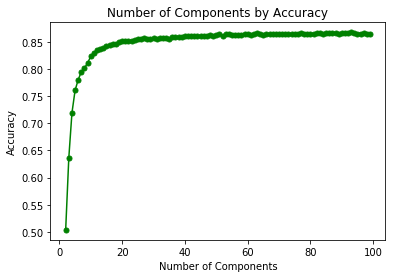

In [77]:
plt.plot(comps, accs, color='green', marker='o',markersize=5)
#plt.plot(comps, fscores, color='blue', marker='o',markersize=5)
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Number of Components by Accuracy')

Text(0.5,1,'Number of Components by Fscore')

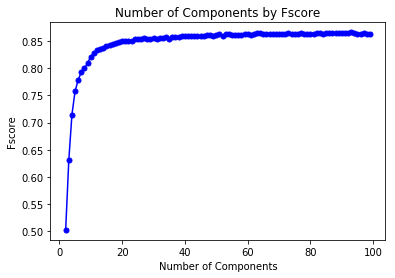

In [78]:
plt.plot(comps, fscores, color='blue', marker='o',markersize=5)
plt.xlabel('Number of Components')
plt.ylabel('Fscore')
plt.title('Number of Components by Fscore')

The maximum accuracy is acheived at 82 principal components which has the accuracy score of 0.86779 and F-beta score of 0.86658. 

### Interpret PCA results

In [79]:
pca, X_pca = apply_pca(20, X)

In [80]:
X_pca.shape

(70000, 20)

In [81]:
components = pca.components_

In [82]:
components.shape

(20, 784)

In [83]:
components

array([[ 0.00030202,  0.00114225,  0.00153463, ...,  0.00636594,
         0.00143845,  0.00061522],
       [ 0.00024068,  0.00192887,  0.00169334, ...,  0.01395085,
         0.00948603,  0.00404957],
       [ 0.00022007,  0.0007164 ,  0.00158504, ...,  0.01051179,
        -0.00093624, -0.00073421],
       ...,
       [ 0.00740239,  0.02953046,  0.03421978, ...,  0.09097096,
         0.07611371,  0.05084096],
       [-0.00061146, -0.01022376, -0.00868821, ..., -0.04898304,
        -0.00489488,  0.01479855],
       [ 0.00993455,  0.04847361,  0.05866701, ..., -0.03950504,
         0.0450094 ,  0.06006252]])

In [84]:
explained_variance = pca.explained_variance_

In [85]:
explained_variance

array([172.90222098, 112.90770787,  42.81137349,  40.04063407,
        31.80842532,  23.60712846,  21.604738  ,  18.16635749,
        13.31212266,  10.34102079,   9.13863173,   7.5326591 ,
         7.06868258,   6.72801851,   5.8432787 ,   5.70598362,
         5.17535305,   4.96217651,   4.88173406,   4.58198086])

In [86]:
explained_variance_ratio = pca.explained_variance_ratio_

In [87]:
explained_variance_ratio

array([0.2205354 , 0.14401288, 0.05460556, 0.05107151, 0.04057139,
       0.0301107 , 0.02755667, 0.02317104, 0.01697951, 0.01318989,
       0.01165625, 0.00960785, 0.00901605, 0.00858153, 0.00745306,
       0.00727794, 0.00660112, 0.00632922, 0.00622661, 0.00584428])

In [88]:
cumRatio = np.cumsum(explained_variance_ratio)

In [89]:
num_components = pca.n_components

In [90]:
num_components

20

Text(0.5,1,'Explained Variance Per Principal Component')

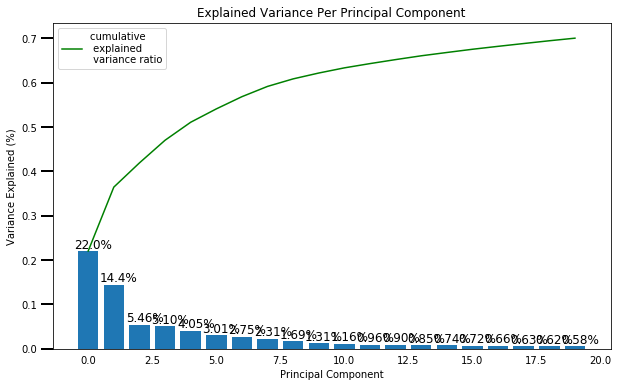

In [91]:
x=np.arange(num_components) # arange: Return evenly spaced values within a given interval
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.bar(x, explained_variance_ratio)
ax.plot(x, cumRatio, color='green', label='cumulative \n explained \n variance ratio')

for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(explained_variance_ratio[i]*100)[:4])), (x[i]+0.2, explained_variance_ratio[i]), va="bottom", ha="center", fontsize=12)
 
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)
    
plt.legend(loc='upper left')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance Per Principal Component')

Each of the bars represents the amount of variability explained by each component. the first component explains 22.0% of the variability in the image data. The second explains 14.4% of the variability and so on. 

Two major parts of PCA:

I. The amount of variance explained by each component. This is called an eigenvalue.

II. The principal components themselves, each component is a vector of weights. In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between between digits. Principal components are also known as eigenvectors.

### Conclusion

In order to classifiy fashion product images into different groups, I've applied several classification algorithms with different hyperparameters to see which one has a better accuracy score. Among all these algorithms, Random Forest clasifer has a higher acuracy score of 0.88048.

But considering that with 784 features for each image that cause overfitting for classification algorithm, I've applied dimentionality reduction, PCA on Fashion-MNIST data set along side Random Forest classifier. I have tried from 2 to 100 components to see where we can get the highest accuracy on this data set. It appeared with 93 components we can get the accuracy score of 0.86809 wich is  close to acuracy score of 0.88048 that I've got with 784 features.